In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use(['dark_background'])
sns.set(color_codes=True)
import mysql.connector

Breaking Up the Project Into Manageable Pieces
Your next task is to outline the steps you’ll need to take in order to create your data science project. Once you have your outline, you can tackle the problem and develop a model to prove your hypothesis. You can do this in six steps:

Generate your hypotheses
Study the data
Clean the data
Engineer the features
Create predictive models
Communicate your results

Generate Your Hypotheses
After you have your problem, you need to create at least one hypothesis to help solve the problem. The hypothesis is your belief about how the data reacts to certain variables. 

This is, of course, dependent on you obtaining the general demographics of specific neighborhoods. You will need to create as many hypotheses as you need to solve the problem.

Study the Data
Your hypotheses need to have data that will allow you to prove or disprove them. Look in the data set for variables that affect the problem. If you do not have the data, either dig deeper or change your hypothesis.

In [4]:
data=pd.read_csv('crop_production.csv')

In [5]:
data.describe()

,index,TIME,Value,Flag Codes
count,20566.000000,20566.000000,2.056600e+04,0.0
mean,10282.500000,2007.591170,1.249281e+04,NaN
std,5937.037154,10.369489,5.960529e+04,NaN
min,0.000000,1970.000000,0.000000e+00,NaN
25%,5141.250000,1999.000000,1.961877e+00,NaN
50%,10282.500000,2008.000000,2.560970e+01,NaN
75%,15423.750000,2017.000000,1.563000e+03,NaN
max,20565.000000,2025.000000,1.146044e+06,NaN


In [6]:
data.head()

,index,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,0,AUS,CROPYIELD,RICE,TONNE_HA,A,1990,8.314607,NaN
1,1,AUS,CROPYIELD,RICE,TONNE_HA,A,1991,8.394737,NaN
2,2,AUS,CROPYIELD,RICE,TONNE_HA,A,1992,8.094340,NaN
3,3,AUS,CROPYIELD,RICE,TONNE_HA,A,1993,8.336000,NaN
4,4,AUS,CROPYIELD,RICE,TONNE_HA,A,1994,8.537815,NaN


In [5]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
data.set_index('CustomerID',inplace=True)
_25th_percentile=np.percentile(data['Annual Income (k$)'],25)
_75th_percentile=np.percentile(data['Annual Income (k$)'],75)
IQR=_75th_percentile-_25th_percentile
Higher_fence=_75th_percentile+1.5*IQR
Lower_fence=_25th_percentile-1.5*IQR
data=data[(Lower_fence<data['Annual Income (k$)'])]# & (data['Annual Income (k$)']>=Higher_fence)]
data=data[(Higher_fence>=data['Annual Income (k$)'])]# & (data['Annual Income (k$)']>=Higher_fence)]

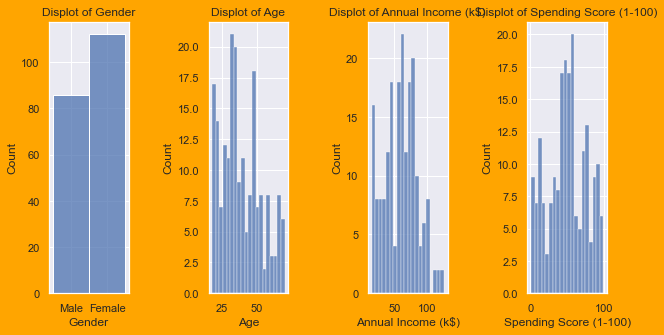

In [9]:
plt.figure(1,figsize=(10,5))
fig = plt.gcf();
fig.set_facecolor('orange')
n=0
for x in ['Gender','Age','Annual Income (k$)','Spending Score (1-100)']:
    n+=1
    plt.subplot(1,4,n)
    plt.subplots_adjust(hspace=1 , wspace=1)
    sns.histplot(data[x],bins=20)
    plt.title('Displot of {}'.format(x))vbh
plt.show()


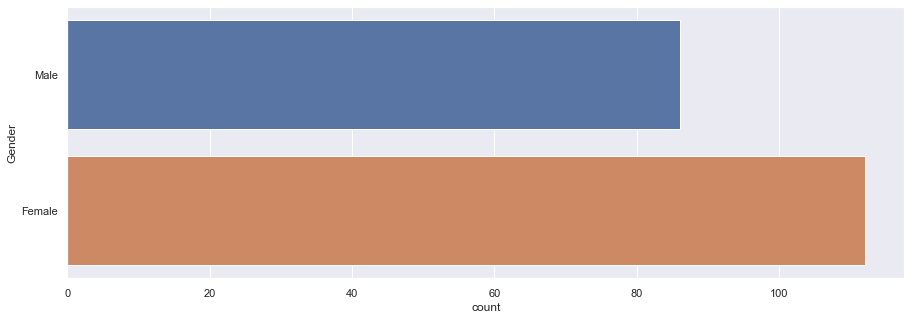

In [10]:
plt.figure(figsize=(15,5))
sns.countplot(y='Gender' , data=data)
plt.show()

C:\Users\nithi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nithi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nithi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


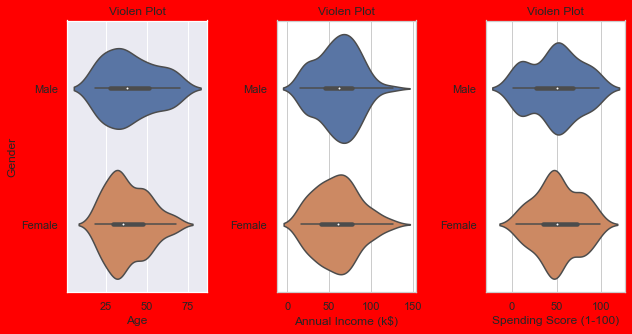

In [11]:
plt.figure(1,figsize=(10,5))
fig = plt.gcf();
fig.set_facecolor('red')
n=0
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    sns.set(style='whitegrid')
    plt.subplots_adjust(hspace=0.5 , wspace=.5)
    sns.violinplot(x,y='Gender',data=data)
    plt.ylabel('Gender'if n==1 else '')
    plt.title('Violen Plot')
plt.show();

In [12]:
df_30=[]
df_40=[]
df_50=[]
df_60=[]
df_70=[]
df_greater_70=[]
for i in data['Age']:
    if i<=30:
        df_30.append(i)
    elif i<=40:
        df_40.append(i)
    elif i<=50:
        df_50.append(i)
    elif i<=60:
        df_60.append(i)
    elif i<=70:
        df_70.append(i)
    else:
        df_greater_70.append(i)
print(len(df_30))

61


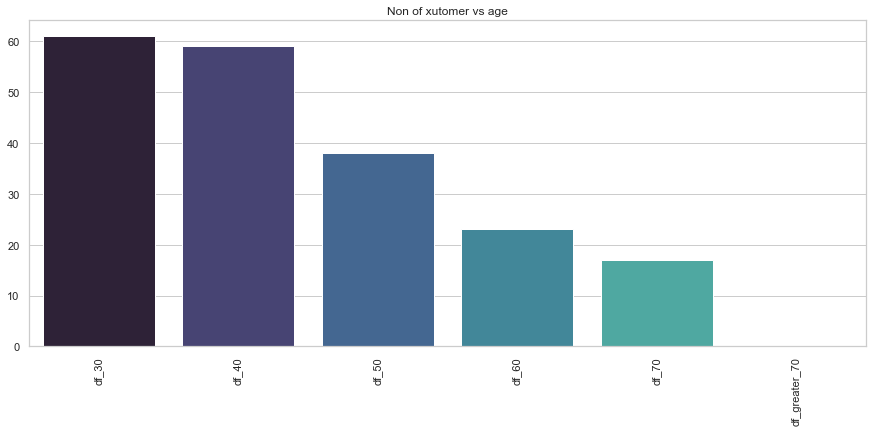

In [13]:
#df=pd.DataFrame(agex,col=agey)
#print(df)
agex=['df_30','df_40','df_50','df_60','df_70','df_greater_70']
agey=[len(df_30),len(df_40),len(df_50),len(df_60),len(df_70),len(df_greater_70)]
plt.figure(figsize=(15,6))
sns.barplot(x=agex,y=agey,palette='mako')
plt.xticks(rotation=90);
plt.title('Non of xutomer vs age');
#plt.text(agey,agex,tuple(agey),ha="center");

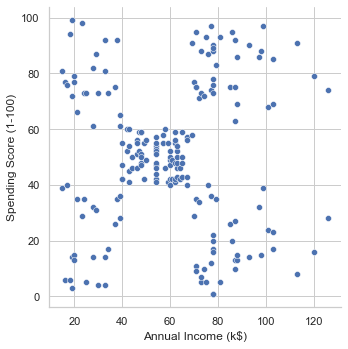

In [14]:
sns.relplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=data);


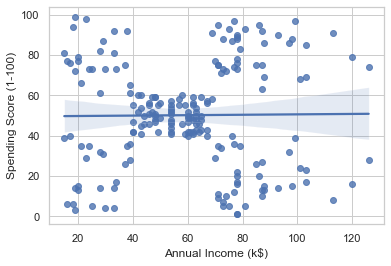

In [15]:
sns.regplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=data);

In [16]:
data['Spending Score (1-100)']

CustomerID
1      39
2      81
3       6
4      77
5      40
       ..
194    91
195    16
196    79
197    28
198    74
Name: Spending Score (1-100), Length: 198, dtype: int64

In [17]:
for i in range(min(data['Spending Score (1-100)']),max(data['Spending Score (1-100)']),5):
    print(i)
    #result_keys.append(i)
    #print(result_keys)
    #result_values.append('ss_'+str(i))
    #print(result_values)

1
6
11
16
21
26
31
36
41
46
51
56
61
66
71
76
81
86
91
96


In [18]:
def Count_of(data, nod):
    result_values=[]
    result_keys=[]
    for i in range(min(data),max(data),nod):
        result_keys.append(i)
        #print(result_keys)
        result_values.append('ss_'+str(i))
        #print(result_values)
    results=dict(zip(result_values,result_keys))
    result_count=[]
    for key, val in results.items():
        key=[]
        for i in data:
            if val<=i:
                key.append(i)
        result_count.append(len(key))
    #print(result_count)
    for  result_count_1 in range(0,len(result_count)-1):
        for  result_count_2 in range(result_count_1+1,result_count_1,-1):
               result_count[result_count_1]=result_count[result_count_1]-result_count[result_count_2]

    #print(result_count,result_values)
    #plt.show()
    df_=pd.DataFrame(result_count,result_values)
    #print(df_)
    df_.rename({0:'NOC'},axis=1,inplace=True)
    #df_ = df_.sort_values(['NOC'],axis=0, ascending=False)
    plt.figure(figsize=(15,6))
    sns.barplot(x=df_.index,y=df_['NOC'])
    plt.title('Number of costomer in the specified range')
    plt.xlabel('Number of costomer')
    plt.ylabel('Spending Score')
    for i, val in enumerate(df_.index):
        y = df_.loc[val].sum()
        plt.text(i, y, str(y), ha="center",fontsize = 15,         color ='red')
    #return 

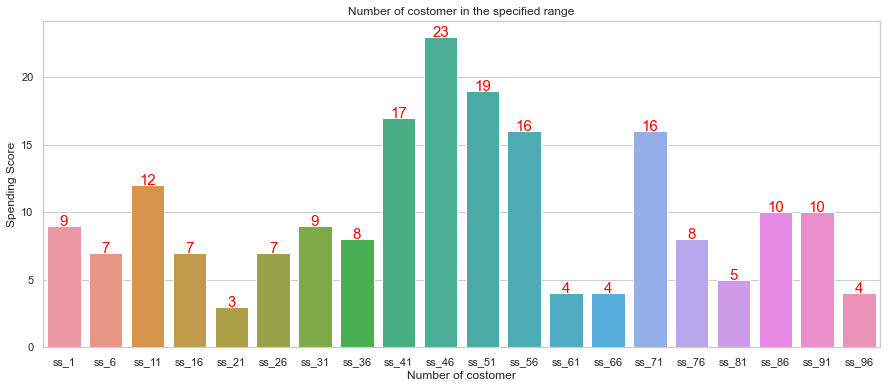

In [19]:
Count_of(data['Spending Score (1-100)'],5)

In [31]:
def Count_of(data, nod):
    result_values=[]
    result_keys=[]
    for i in range(min(data),max(data),nod):
        result_keys.append(i)
        result_values.append('ss_'+str(i))
    results=dict(zip(result_values,result_keys))
    result_count=[]
    for key, val in results.items():
        key=[]
        for i in data:
            if val<=i:
                key.append(i)
        result_count.append(len(key))
    for  result_count_1 in range(0,len(result_count)-1):
        for  result_count_2 in range(result_count_1+1,result_count_1,-1):
               result_count[result_count_1]=result_count[result_count_1]-result_count[result_count_2]

    df_=pd.DataFrame(result_count,result_values)
    df_.rename({0:'NOC'},axis=1,inplace=True)
    #df_ = df_.sort_values(['NOC'],axis=0, ascending=False)
    df_['Total']=df_['NOC']
    df_['Total']=df_['Total']*100/sum(df_['Total'])
    plt.figure(figsize=(15,6))
    plt.bar(df_.index, df_.Total, color='Orange');
    plt.bar(df_.index, 100-(df_.Total),bottom=df_.Total, color='Green');
    df__=df_.drop('NOC',axis=1)
    #print(df__)
    for i, val in enumerate(df__.index):
        y = df__.loc[val].sum()
        plt.text(i, y, str(round(y,2)), ha="center",fontsize = 15, color ='Black',)
    plt.xticks(rotation=90);


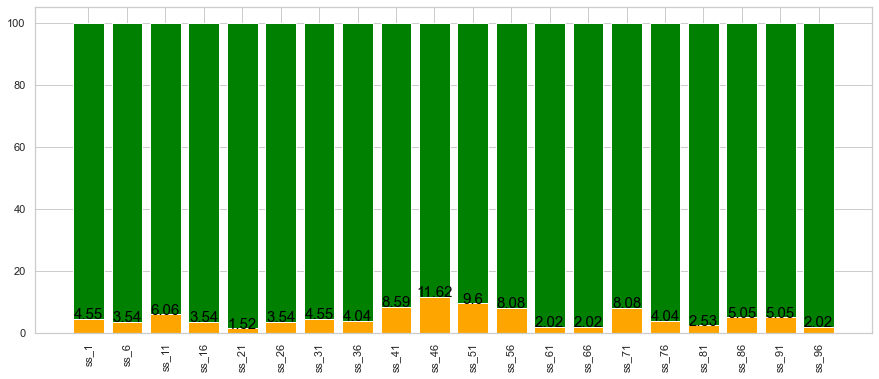

In [32]:
Count_of(data['Spending Score (1-100)'],5)

In [36]:
def Count_of(data, nod):
    result_values=[]
    result_keys=[]
    for i in range(min(data),max(data),nod):
        result_keys.append(i)
        result_values.append('ss_'+str(i))
    results=dict(zip(result_values,result_keys))
    result_count=[]
    for key, val in results.items():
        key=[]
        for i in data:
            if val<=i:
                key.append(i)
        result_count.append(len(key))
    for  result_count_1 in range(0,len(result_count)-1):
        for  result_count_2 in range(result_count_1+1,result_count_1,-1):
               result_count[result_count_1]=result_count[result_count_1]-result_count[result_count_2]

    df_=pd.DataFrame(result_count,result_values)
    df_.rename({0:'NOC'},axis=1,inplace=True)
    #df_ = df_.sort_values(['NOC'],axis=0, ascending=False)
    df_['Total']=df_['NOC']
    df_['Total']=df_['Total']*100/sum(df_['Total'])
    plt.figure(figsize=(15,6))
    plt.stackplot(df_.index, df_.Total,color='magenta', lw=3
                  , edgecolor='red', cmap='Set2');
    #plt.stackplot(df_.index, 100-(df_.Total),bottom=df_.Total, color='Green');
    df__=df_.drop('NOC',axis=1)
    #print(df__)
    for i, val in enumerate(df__.index):
        y = df__.loc[val].sum()
        plt.text(i, y, str(round(y,2)), ha="left",fontsize = 20, color ='black',)
    plt.xticks(rotation=90);


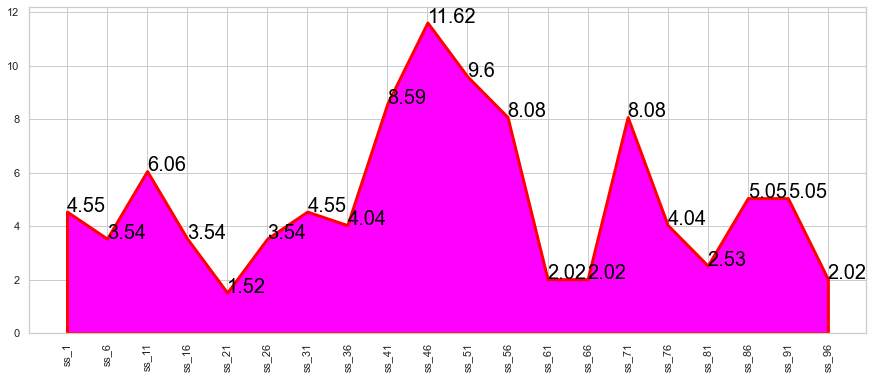

In [37]:
Count_of(data['Spending Score (1-100)'],5)

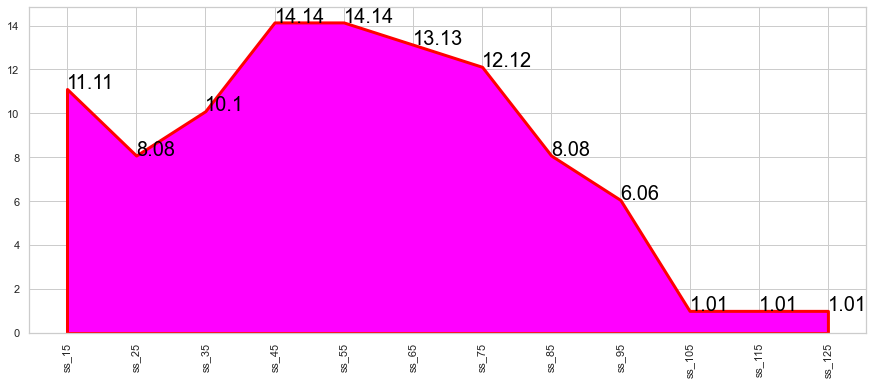

In [38]:
Count_of(data['Annual Income (k$)'],10)

In [39]:
x1=data.loc[:,["Age",'Spending Score (1-100)']].values

In [40]:
print(x1)

[[19 39]
 [21 81]
 [20  6]
 [23 77]
 [31 40]
 [22 76]
 [35  6]
 [23 94]
 [64  3]
 [30 72]
 [67 14]
 [35 99]
 [58 15]
 [24 77]
 [37 13]
 [22 79]
 [35 35]
 [20 66]
 [52 29]
 [35 98]
 [35 35]
 [25 73]
 [46  5]
 [31 73]
 [54 14]
 [29 82]
 [45 32]
 [35 61]
 [40 31]
 [23 87]
 [60  4]
 [21 73]
 [53  4]
 [18 92]
 [49 14]
 [21 81]
 [42 17]
 [30 73]
 [36 26]
 [20 75]
 [65 35]
 [24 92]
 [48 36]
 [31 61]
 [49 28]
 [24 65]
 [50 55]
 [27 47]
 [29 42]
 [31 42]
 [49 52]
 [33 60]
 [31 54]
 [59 60]
 [50 45]
 [47 41]
 [51 50]
 [69 46]
 [27 51]
 [53 46]
 [70 56]
 [19 55]
 [67 52]
 [54 59]
 [63 51]
 [18 59]
 [43 50]
 [68 48]
 [19 59]
 [32 47]
 [70 55]
 [47 42]
 [60 49]
 [60 56]
 [59 47]
 [26 54]
 [45 53]
 [40 48]
 [23 52]
 [49 42]
 [57 51]
 [38 55]
 [67 41]
 [46 44]
 [21 57]
 [48 46]
 [55 58]
 [22 55]
 [34 60]
 [50 46]
 [68 55]
 [18 41]
 [48 49]
 [40 40]
 [32 42]
 [24 52]
 [47 47]
 [27 50]
 [48 42]
 [20 49]
 [23 41]
 [49 48]
 [67 59]
 [26 55]
 [49 56]
 [21 42]
 [66 50]
 [54 46]
 [68 43]
 [66 48]
 [65 52]
 

In [41]:
from sklearn.cluster import KMeans

C:\Users\nithi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


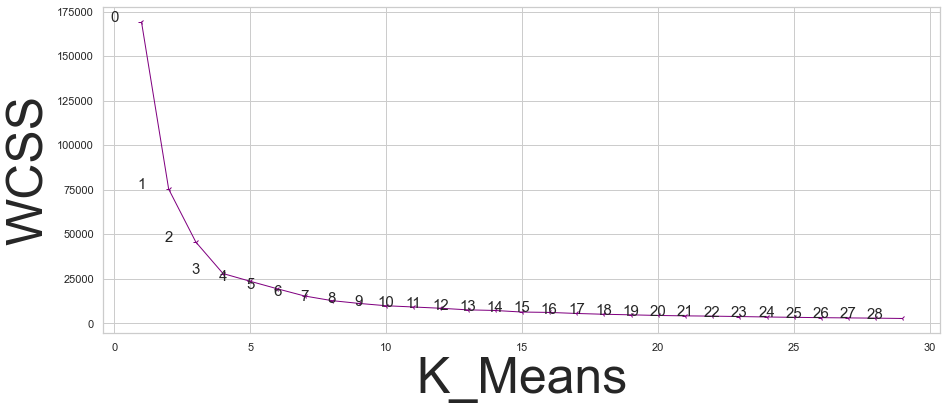

In [42]:
wcss=[]
for k in range(1,30):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,6))
plt.grid(True)
plt.plot(range(1,30),wcss,lw=1,color='purple',marker='3');
plt.xlabel('K_Means',fontsize=50)
plt.ylabel('WCSS',fontsize=50)
#df_=pd.DataFrame(range(1,22),wcss)
for i,j in enumerate(wcss):
    j =wcss[i]#.sum()
    plt.text((i),(j),str(i),fontsize=15,ha='center');
plt.show();

In [43]:
def kkmeans_values(Clusters,Line_width_plt, col_plt,
                  front_size_cluster,col_cluster):
    wcss=[]
    for k in range(1,Clusters):
        kmeans=KMeans(n_clusters=k)
        kmeans.fit(x1)
        wcss.append(kmeans.inertia_)
    plt.figure(figsize=(15,6))
    plt.grid(True)
    plt.plot(range(1,Clusters),wcss,lw=Line_width_plt,color=(col_plt),marker='3');
    plt.xlabel('K_Means',fontsize=50)
    plt.ylabel('WCSS',fontsize=50)
    #df_=pd.DataFrame(range(1,22),wcss)
    for i,j in enumerate(wcss):
        j =wcss[i]#.sum()
        plt.text((i),(j),str(i),fontsize=front_size_cluster,ha='center',color=(col_cluster));
    plt.show();

C:\Users\nithi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


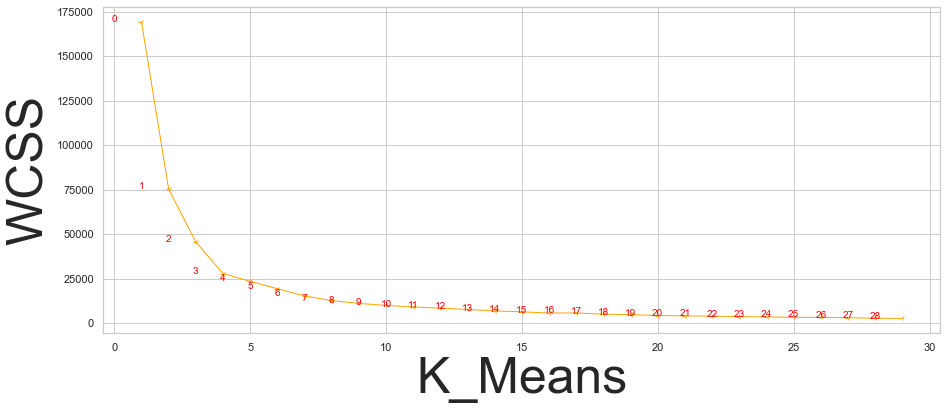

In [44]:
kkmeans_values(30,1,'orange',10,'red')

In [51]:
kmeans=KMeans(n_clusters=15)
k=kmeans.fit_predict(x1)
print(k)

[14 11  2 11  3 11  2  0  5  8  5 12  5 11  6 11  3 11  7 12  3 11  6  8
  5  0  7  9  7  0  5 11  5  0  6 11  6  8  7 11  4  0  1  9  7  9 13 10
  3  3 13  9  9 13  1  1 13  4 10  1  4 10  4 13  4 10  1  4 10  3  4  1
  4 13  4 10 13  3 10  1 13  9  4  1 10  1 13 10  9  1  4 14  1  3  3 10
  1 10  1 10 14  1  4 10 13 14  4  1  4  4  4 10  3 14 10 10  4 13  1 13
 10  3  9 12 14  8  7 12  5  8  6  8 14  8  2  0  6  8  2  8  5 12  3  0
  2 12  1  8  7 12  6 12  6  8  6  0  2  8  2  8  1  0  2 12  7  8  6 12
  7  9  6  8  2 12  6  0  5  8  5 12  7  0  6  0  3 12  6  8  6 12  7  8
  2 12  6  8  7  8]


In [52]:
print(kmeans.cluster_centers_)

[[27.08333333 87.83333333]
 [49.         43.55555556]
 [27.8         6.4       ]
 [34.61538462 40.92307692]
 [65.94117647 48.82352941]
 [58.9         9.9       ]
 [45.0625     14.75      ]
 [41.75       28.25      ]
 [32.25       73.55      ]
 [33.11111111 59.66666667]
 [22.47058824 53.11764706]
 [21.9        75.8       ]
 [34.73333333 92.93333333]
 [52.33333333 55.5       ]
 [21.14285714 38.85714286]]


C:\Users\nithi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nithi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


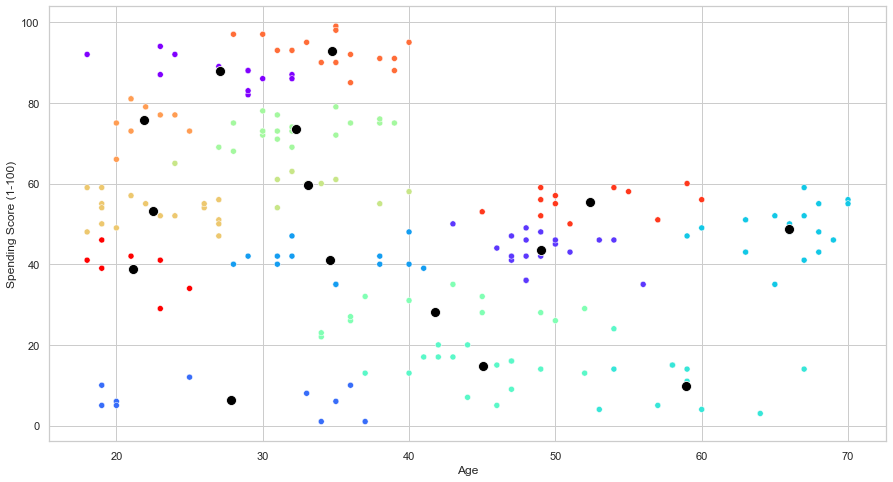

In [69]:
plt.figure(figsize=(15,8))
sns.scatterplot("Age",'Spending Score (1-100)',data=data,c=kmeans.labels_,cmap='rainbow')
sns.scatterplot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='Black',s=100
                , markers='8');

In [ ]:
data.median()

In [ ]:
data.dropna(inplace=True)

In [ ]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
data.boxplot();

In [ ]:
data['Annual Income (k$)'].median()

In [ ]:
data['Annual Income (k$)'].mean()

In [ ]:
data

In [ ]:
_25th_percentile=np.percentile(data['Annual Income (k$)'],25)

In [ ]:
IQR=_75th_percentile-_25th_percentile

In [ ]:
IQR

In [ ]:
Higher_fence=_75th_percentile+1.5*IQR

In [ ]:
Higher_fence

In [ ]:
Lower_fence=_25th_percentile-1.5*IQR

In [ ]:
Lower_fence

In [ ]:
data=data[(Lower_fence<data['Annual Income (k$)'])]# & (data['Annual Income (k$)']>=Higher_fence)]

In [ ]:
data=data[(Higher_fence>=data['Annual Income (k$)'])]# & (data['Annual Income (k$)']>=Higher_fence)]

In [ ]:
data

In [ ]:
fig = plt.gcf();
fig.set_facecolor('orange')
fig.set_size_inches(10, 6);
data.boxplot();

In [ ]:
data.describe()

In [ ]:
data.median()